# **Activity 1**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE,ADASYN

In [2]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("creditcard.csv")
df.head(5)
df.shape
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
X=df.drop('Class',axis=1)
y=df['Class']
print("Number of original Transaction :",sum(y==0))
print("Number of Fraudulant transactions:",sum(y==1))


Number of original Transaction : 284315
Number of Fraudulant transactions: 492


In [5]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
print("After SMOTE:")
print("Original Transaction:",sum(y_res==0))
print("Fraudulant Transaction:",sum(y_res==1))


After SMOTE:
Original Transaction: 284315
Fraudulant Transaction: 284315


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [7]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [8]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("f1 Score = ",f1_score(y_test,y_pred))


Accuracy =  0.9990943144047975
f1 Score =  0.9990969269212222


In [9]:
param_grid = {'n_neighbors': [3, 5, 7, 9]} 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=3, n_jobs=-1)
grid.fit(X_train_scaled[:500], y_train[:500])  

print("Best k value found:", grid.best_params_)
best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
best_knn.fit(X_train_scaled, y_train)


Best k value found: {'n_neighbors': 3}


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred_best=best_knn.predict(X_test_scaled)
print("Best : ")
print("Accuracy = ",accuracy_score(y_test,y_pred_best))
print("F1 Score = ",f1_score(y_test,y_pred_best))
print("\nClassification Report = ",classification_report(y_test,y_pred_best))

Best : 
Accuracy =  0.9994196577739479
F1 Score =  0.99942114402989

Classification Report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



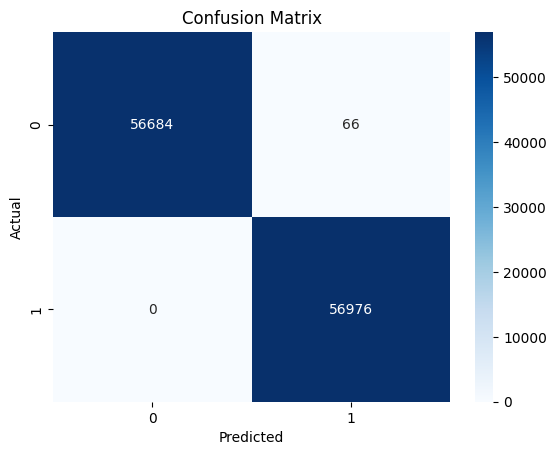

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_best)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Activity 2**

In [13]:
import os
from PIL import Image
from tqdm import tqdm
from sklearn.svm import SVC
import random

Random_State=42
np.random.seed(Random_State)
random.seed(Random_State)



In [14]:
DATA_DIR="archive/brain_tumor_dataset"
IMG_SIZE=(64,64)

In [15]:
for root, dirs, files in os.walk(DATA_DIR):
    print(root)
    print("SubFolder :",dirs)
    break

archive/brain_tumor_dataset
SubFolder : ['no', 'yes']


In [16]:
Image_paths=[
]
labels=[]
for class_folder in sorted(os.listdir(DATA_DIR)):
    class_path=os.path.join(DATA_DIR,class_folder)
    if not os.path.isdir(class_path):
        continue
    for fname in os.listdir(class_path):
        fpath=os.path.join(class_path,fname)
        if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            Image_paths.append(fpath)
            labels.append(class_folder)
            
print("Found ",len(Image_paths),"Image in classes :",sorted(set(labels)))

Found  253 Image in classes : ['no', 'yes']


In [19]:
#Cell copied from Chatgpt coz i wasn't able to understand it
# Preprocess images - safe for different Pillow versions
from PIL import Image

# choose correct resample constant depending on Pillow version
try:
    RESAMPLE = Image.Resampling.LANCZOS    # Pillow >= 9.1
except AttributeError:
    try:
        RESAMPLE = Image.LANCZOS            # older Pillow
    except AttributeError:
        RESAMPLE = Image.BICUBIC            # very old fallback

X = []
y = []
failed = 0

for p, label in tqdm(zip(Image_paths, labels), total=len(labels), desc="Processing images"):
    try:
        img = Image.open(p).convert('L')        # convert to grayscale
        img = img.resize(IMG_SIZE, resample=RESAMPLE)
        arr = np.asarray(img, dtype=np.float32)
        flat = arr.ravel()
        X.append(flat)
        y.append(label)
    except Exception as e:
        failed += 1
        # print only a few errors to avoid flooding output
        if failed <= 10:
            print("Error reading", p, e)

print(f"Processed: {len(X)} | Failed: {failed}")
X = np.array(X)
y = np.array(y)
print("X shape:", X.shape, "y shape:", y.shape)


Processing images: 100%|██████████| 253/253 [00:00<00:00, 417.65it/s]

Processed: 253 | Failed: 0
X shape: (253, 4096) y shape: (253,)


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_enc=le.fit_transform(y)
print("Classes :",le.classes_)


Classes : ['no' 'yes']


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=Random_State,stratify=y_enc)
print("training :",X_train.shape,y_train.shape,"\n Test:",X_test.shape,y_test.shape)


training : (202, 4096) (202,) 
 Test: (51, 4096) (51,)


In [23]:
scale=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
svm=SVC(kernel='rbf',C=1.0,gamma='scale',random_state=Random_State)
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test_scaled)
acc=accuracy_score(y_test,y_pred)
print("Accuracy : ",acc)
print("\n Classification Report :",classification_report(y_test,y_pred,target_names=le.classes_))


Accuracy :  0.39215686274509803

 Classification Report :               precision    recall  f1-score   support

          no       0.39      1.00      0.56        20
         yes       0.00      0.00      0.00        31

    accuracy                           0.39        51
   macro avg       0.20      0.50      0.28        51
weighted avg       0.15      0.39      0.22        51



c:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

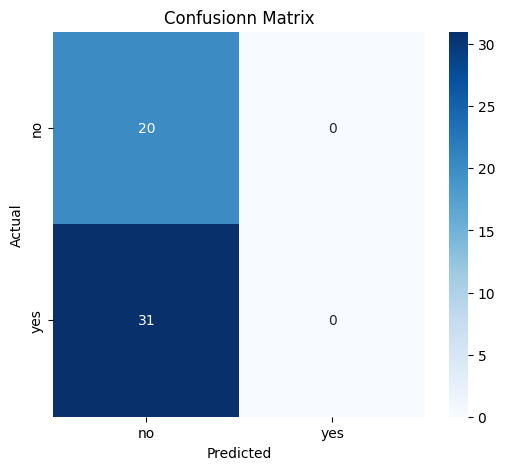

In [26]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusionn Matrix')
plt.show()